In [ ]:
%matplotlib inline

In [1]:
from google.colab import drive

drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


In [2]:
import sys
S7_PROJECT_PATH = '/content/drive/MyDrive/CVMODEL/DEPTHSEP/'
sys.path.append(S7_PROJECT_PATH)
import os
#os.chdir(S7_PROJECT_PATH+'/Model/')

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [4]:
sys.path.append ('/content/drive/MyDrive/CVMODEL/DEPTHSEP/TransForm/')
from datatransform import Transforms

common_transforms = Transforms(normalize=False, mean=None, stdev=None)


In [5]:
sys.path.append ('/content/drive/MyDrive/CVMODEL/DEPTHSEP/DataLoader/')
from getdata import DataLoader
from torchvision import datasets, transforms
trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=common_transforms.train_transforms())
# Downloading Testset
testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=common_transforms.test_transforms())

# Calculating Mean and Std dev
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = trainset.data
#train_data = trainset.transform(train_data.numpy())

test_data = testset.data

full_data = np.concatenate((train_data, test_data),axis=0)

full_data.reshape(-1,full_data.shape[-1])

mean=full_data.reshape(-1,full_data.shape[-1]).mean(0)/255

std=full_data.reshape(-1,full_data.shape[-1]).std(0)/255

print(full_data[0].shape)
print(mean)
print(std)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
(32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


In [6]:
SEED = 1

updated_transforms= Transforms(normalize=True, mean=(0.49186878, 0.48265391, 0.44717728), stdev=(0.24697121, 0.24338894, 0.26159259))

# Downloading TrainSet
trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=updated_transforms.train_transforms())

# Downloading Testset
testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=updated_transforms.test_transforms())

# Creating object of a class
dataloader= DataLoader(shuffle=True, batch_size=64, seed=SEED, num_workers=2, pin_memory=True)


# train data loader
trainloader = dataloader.load(trainset)

# test data loader
testloader = dataloader.load(testset)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


horse plane  deer   car


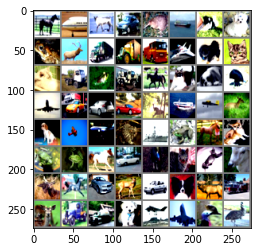

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
sys.path.append('/content/drive//MyDrive/CVMODEL/DEPTHSEP/Model/')

from model import Cfar10Net
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = Cfar10Net(dropout_value=0.1).to(device)

summary(model,input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
         MaxPool2d-9           [-1, 32, 16, 16]               0
           Conv2d-10           [-1, 64, 16, 16]          18,432
             ReLU-11           [-1, 64, 16, 16]               0
      BatchNorm2d-12           [-1, 64, 16, 16]             128
          Dropout-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1, 64,

In [11]:

import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
Loss="CrossEntropyLoss"
EPOCHS = 20
model.device=dataloader.device
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
model.gotrain(optimizer=optimizer, train_loader=trainloader, test_loader=testloader, epochs=EPOCHS, statspath=S7_PROJECT_PATH+"Save_Model", scheduler=None, batch_scheduler=False, L1lambda=0, LossType=Loss)


Validation loss decreased (100000.000000 --> 0.991584).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0122, Accuracy: 72.50%; Test set: Average loss: 0.9916, Accuracy: 71.63%



Validation loss decreased (0.991584 --> 0.930240).  Saving model ...
Epoch: 2, Train set: Average loss: 0.0111, Accuracy: 75.22%; Test set: Average loss: 0.9302, Accuracy: 74.05%



Validation loss decreased (0.930240 --> 0.856740).  Saving model ...
Epoch: 3, Train set: Average loss: 0.0101, Accuracy: 77.30%; Test set: Average loss: 0.8567, Accuracy: 75.76%



Validation loss decreased (0.856740 --> 0.826205).  Saving model ...
Epoch: 4, Train set: Average loss: 0.0094, Accuracy: 79.08%; Test set: Average loss: 0.8262, Accuracy: 77.19%



Epoch: 5, Train set: Average loss: 0.0087, Accuracy: 80.55%; Test set: Average loss: 0.8338, Accuracy: 77.92%



Validation loss decreased (0.826205 --> 0.762347).  Saving model ...
Epoch: 6, Train set: Average loss: 0.0081, Accuracy: 81.78%; Test set: Average loss: 0.7623, Accuracy: 78.95%



Validation loss decreased (0.762347 --> 0.758214).  Saving model ...
Epoch: 7, Train set: Average loss: 0.0077, Accuracy: 82.71%; Test set: Average loss: 0.7582, Accuracy: 79.03%



Epoch: 8, Train set: Average loss: 0.0072, Accuracy: 84.08%; Test set: Average loss: 0.8001, Accuracy: 79.03%



Validation loss decreased (0.758214 --> 0.752835).  Saving model ...
Epoch: 9, Train set: Average loss: 0.0068, Accuracy: 84.77%; Test set: Average loss: 0.7528, Accuracy: 79.43%



Validation loss decreased (0.752835 --> 0.750657).  Saving model ...
Epoch: 10, Train set: Average loss: 0.0064, Accuracy: 85.68%; Test set: Average loss: 0.7507, Accuracy: 79.74%



Validation loss decreased (0.750657 --> 0.744974).  Saving model ...
Epoch: 11, Train set: Average loss: 0.0061, Accuracy: 86.52%; Test set: Average loss: 0.7450, Accuracy: 80.13%



Epoch: 12, Train set: Average loss: 0.0057, Accuracy: 87.48%; Test set: Average loss: 0.7500, Accuracy: 80.38%



Epoch: 13, Train set: Average loss: 0.0054, Accuracy: 88.06%; Test set: Average loss: 0.7546, Accuracy: 80.17%



Validation loss decreased (0.744974 --> 0.718066).  Saving model ...
Epoch: 14, Train set: Average loss: 0.0052, Accuracy: 88.36%; Test set: Average loss: 0.7181, Accuracy: 81.56%



Epoch: 15, Train set: Average loss: 0.0048, Accuracy: 89.28%; Test set: Average loss: 0.7325, Accuracy: 81.23%



Epoch: 16, Train set: Average loss: 0.0046, Accuracy: 89.87%; Test set: Average loss: 0.7244, Accuracy: 81.35%



Epoch: 17, Train set: Average loss: 0.0043, Accuracy: 90.47%; Test set: Average loss: 0.7338, Accuracy: 81.35%



Validation loss decreased (0.718066 --> 0.691299).  Saving model ...
Epoch: 18, Train set: Average loss: 0.0041, Accuracy: 90.86%; Test set: Average loss: 0.6913, Accuracy: 82.24%



Epoch: 19, Train set: Average loss: 0.0038, Accuracy: 91.60%; Test set: Average loss: 0.7549, Accuracy: 81.91%



Epoch: 20, Train set: Average loss: 0.0036, Accuracy: 92.05%; Test set: Average loss: 0.7026, Accuracy: 82.39%



3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [97]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
Loss="CrossEntropyLoss"
EPOCHS = 20
model.device=dataloader.device
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [98]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer,epoch):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0000f})\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100.000 * correct / len(test_loader.dataset)))


In [ ]:

for epoch in range(1, 5):
    train(model, device, trainloader, optimizer, epoch)
    test(model, device, testloader)



  0%|          | 0/782 [00:00<?, ?it/s]

loss=2.3342039585113525 batch_id=0:   0%|          | 0/782 [00:00<?, ?it/s]

loss=2.3342039585113525 batch_id=0:   0%|          | 1/782 [00:00<01:58,  6.60it/s]

loss=2.3740549087524414 batch_id=1:   0%|          | 1/782 [00:00<01:58,  6.60it/s]

loss=2.3420262336730957 batch_id=2:   0%|          | 1/782 [00:00<01:58,  6.60it/s]

loss=2.3128859996795654 batch_id=3:   0%|          | 1/782 [00:00<01:58,  6.60it/s]

loss=2.3259851932525635 batch_id=4:   0%|          | 1/782 [00:00<01:58,  6.60it/s]

loss=2.3259851932525635 batch_id=4:   1%|          | 5/782 [00:00<01:29,  8.69it/s]

loss=2.258713960647583 batch_id=5:   1%|          | 5/782 [00:00<01:29,  8.69it/s] 

loss=2.263012647628784 batch_id=6:   1%|          | 5/782 [00:00<01:29,  8.69it/s]

loss=2.294787645339966 batch_id=7:   1%|          | 5/782 [00:00<01:29,  8.69it/s]

loss=2.289801597595215 batch_id=8:   1%|          | 5/782 [00:00<01:29,  8.69it/s]

loss=2.289801597595215 batch_id=8


Test set: Average loss: 1.2964, Accuracy: 5234/10000 (52)





loss=0.9544836282730103 batch_id=0:   0%|          | 0/782 [00:00<?, ?it/s]

loss=0.9544836282730103 batch_id=0:   0%|          | 1/782 [00:00<01:57,  6.67it/s]

loss=1.294924020767212 batch_id=1:   0%|          | 1/782 [00:00<01:57,  6.67it/s] 

loss=1.010979175567627 batch_id=2:   0%|          | 1/782 [00:00<01:57,  6.67it/s]

loss=1.1323024034500122 batch_id=3:   0%|          | 1/782 [00:00<01:57,  6.67it/s]

loss=1.2755638360977173 batch_id=4:   0%|          | 1/782 [00:00<01:57,  6.67it/s]

loss=1.2755638360977173 batch_id=4:   1%|          | 5/782 [00:00<01:27,  8.87it/s]

loss=1.0754337310791016 batch_id=5:   1%|          | 5/782 [00:00<01:27,  8.87it/s]

loss=1.3467073440551758 batch_id=6:   1%|          | 5/782 [00:00<01:27,  8.87it/s]

loss=1.0676153898239136 batch_id=7:   1%|          | 5/782 [00:00<01:27,  8.87it/s]

loss=1.3117001056671143 batch_id=8:   1%|          | 5/782 [00:00<01:27,  8.87it/s]

loss=1.1596763134002686 batch_id=9:   1%|          | 5/782 [00:00<01:27,


Test set: Average loss: 1.0077, Accuracy: 6343/10000 (63)





loss=0.9139736890792847 batch_id=0:   0%|          | 0/782 [00:00<?, ?it/s]

loss=0.9139736890792847 batch_id=0:   0%|          | 1/782 [00:00<01:57,  6.67it/s]

loss=0.8255544304847717 batch_id=1:   0%|          | 1/782 [00:00<01:57,  6.67it/s]

loss=0.9398017525672913 batch_id=2:   0%|          | 1/782 [00:00<01:57,  6.67it/s]

loss=0.8402583599090576 batch_id=3:   0%|          | 1/782 [00:00<01:57,  6.67it/s]

loss=1.0212279558181763 batch_id=4:   0%|          | 1/782 [00:00<01:57,  6.67it/s]

loss=1.0212279558181763 batch_id=4:   1%|          | 5/782 [00:00<01:27,  8.86it/s]

loss=1.0303013324737549 batch_id=5:   1%|          | 5/782 [00:00<01:27,  8.86it/s]

loss=0.9561797976493835 batch_id=6:   1%|          | 5/782 [00:00<01:27,  8.86it/s]

loss=0.798398494720459 batch_id=7:   1%|          | 5/782 [00:00<01:27,  8.86it/s] 

loss=1.0567607879638672 batch_id=8:   1%|          | 5/782 [00:00<01:27,  8.86it/s]

loss=0.8586025238037109 batch_id=9:   1%|          | 5/782 [00:00<01:27

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [ ]:
model = Cfar10Net(dropout_value=0.1).to(device)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

RuntimeError: ignored

5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [ ]:
outputs = net(images)

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))